In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [34]:
# read data
cars = pd.read_csv('data/vehicles.csv')
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [35]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [36]:
cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [ ]:
cars.select_dtypes(include=['number']).corr()['price'].sort_values(ascending=False)

ValueError: could not convert string to float: 'prescott'

In [197]:
cars_numeric = cars.copy()
cars_numeric = cars_numeric[(cars_numeric['price'] != 0) & (cars_numeric['price'] != 1)]
cars_numeric = cars_numeric[(cars_numeric['price'] < 100000)]
cars_numeric['price'].value_counts().sort_values()  

bins = np.arange(0, cars_numeric['price'].max() + 5000, 5000)
cars_numeric['bins'] = pd.cut(cars_numeric['price'], bins=bins)

cars_numeric = cars_numeric[cars_numeric['cylinders'] != 'other']
condition_mapping = {
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0
}
title_status_mapping = {
    'clean': 5,
    'salvage': 4,
    'rebuilt': 3,
    'lien': 2,
    'missing': 1,
    'parts only': 0
}
size_mapping = {
    'full-size': 3,
    'mid-size': 2,
    'compact':  1,
    'sub-compact': 0
}
fuel_mapping = {
    'gas': 3,
    'diesel': 2,
    'electric': 1,
    'hybrid': 0
}
cylinders_mapping = {
    '12 cylinders': 6,
    '10 cylinders': 5,
    '8 cylinders': 4,
    '6 cylinders': 3,
    '5 cylinders': 2,
    '4 cylinders': 1,
    '3 cylinders': 0
}
drive_mapping = {
    '4wd': 2,
    'rwd': 1,
    'fwd': 0
}
cars_numeric['bin_index'] = cars_numeric.groupby('bins', observed=True).cumcount()+1

cars_numeric['condition'] = cars_numeric['condition'].map(condition_mapping)
cars_numeric['title_status'] = cars_numeric['title_status'].map(title_status_mapping)    
cars_numeric['size'] = cars_numeric['size'].map(size_mapping)
cars_numeric['fuel'] = cars_numeric['fuel'].map(fuel_mapping)
cars_numeric['cylinders'] = cars_numeric['cylinders'].map(cylinders_mapping)
cars_numeric['drive'] = cars_numeric['drive'].map(drive_mapping)
cars_numeric = cars_numeric.select_dtypes(include=np.number)

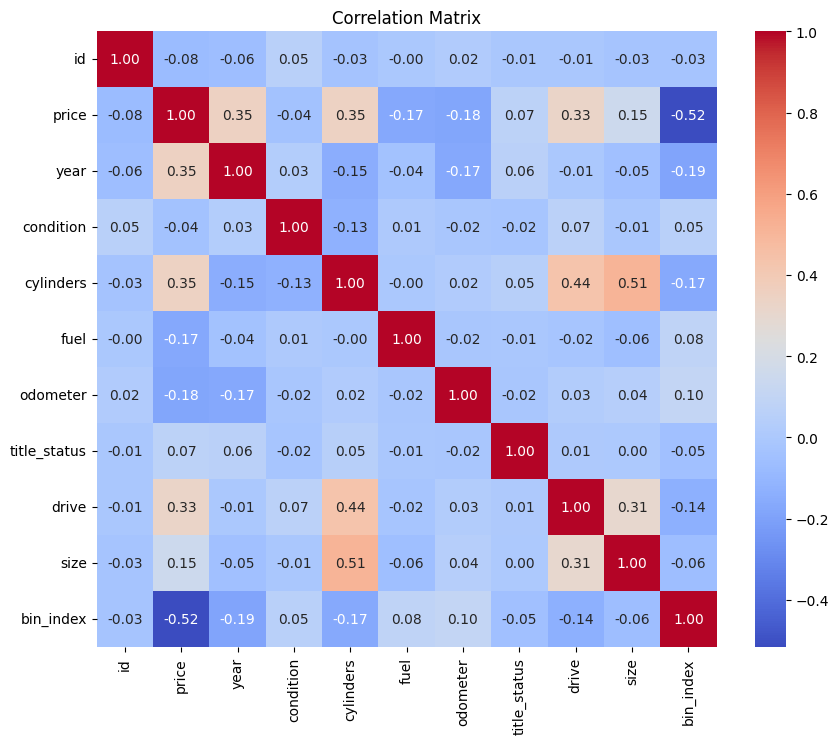

In [198]:
# Correlation matrix
corr = cars_numeric.corr()

    
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, fmt=".2f", cmap="coolwarm", annot=True)
plt.title('Correlation Matrix')
plt.show()

## Features deemed important to consumers
* region (if they don't want to purchase out of state or pay for shipping/transport fees)
* price 
* year
* manufacturer
* model
* type (if they don't know exactly what they want)
* condition
* fuel
* odometer
* title_status
* paint_color

Drop 
* cylinders
* transmission (the "other" category is an intersting one)
* VIN (to look up accident history, but probably not in this case)
* drive (4wd,rwd, fwd)
* size
* region, state



In [175]:
cars.query('price > 125000')[['price','manufacturer','model','year']]

,price,manufacturer,model,year
1727,130000,chevrolet,corvette,2019.0
2922,140000,jeep,renegade,2015.0
5003,145000,NaN,freightliner m2 106,2014.0
7628,145000,NaN,freightliner m2 106,2014.0
11093,129888,rover,defender 110,1993.0
...,...,...,...,...
386256,127333,rover,sport,2020.0
386293,139950,NaN,Mclaren 570GT W/ Upgrades,2014.0
386313,139950,NaN,Mclaren 570GT W Upgrades,2015.0
406741,129999,porsche,911,2014.0


In [184]:
cars = cars[(cars['price'] != 0) & (cars['price'] != 1)]
cars = cars[(cars['price'] < 100000)]
cars['price'].value_counts().sort_values()  

bins = np.arange(0, cars['price'].max() + 5000, 5000)
cars['bins'] = pd.cut(cars['price'], bins=bins)
#cars.query('price > 0').plot(kind='scatter', x='year', y='price')

#cars.info()

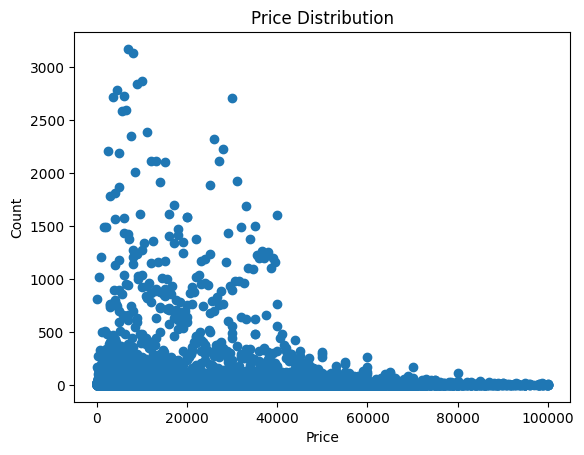

           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state            bins  
0  NaN  NaN         NaN    az   (5000, 10000]  
1 

In [ ]:
plt.Figure(figsize=(10, 8))
price_counts = cars['price'].value_counts().sort_values()
#price_counts = cars['bins'].value_counts().sort_values()
plt.scatter(price_counts.index, price_counts.values)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.show()
print(cars.head())
print(type(cars['bins']))


In [193]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391337 entries, 0 to 426879
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            391337 non-null  int64   
 1   region        391337 non-null  object  
 2   price         391337 non-null  int64   
 3   year          390166 non-null  float64 
 4   manufacturer  375609 non-null  object  
 5   model         386787 non-null  object  
 6   condition     241039 non-null  object  
 7   cylinders     231967 non-null  object  
 8   fuel          388747 non-null  object  
 9   odometer      389057 non-null  float64 
 10  title_status  383604 non-null  object  
 11  transmission  389523 non-null  object  
 12  VIN           240655 non-null  object  
 13  drive         272208 non-null  object  
 14  size          109882 non-null  object  
 15  type          306462 non-null  object  
 16  paint_color   275365 non-null  object  
 17  state         391337 non-null  obj

In [186]:
price_dist = cars['bins'].value_counts().sort_index()
print(price_dist)

bins
(0, 5000]          62334
(5000, 10000]      79057
(10000, 15000]     53711
(15000, 20000]     48580
(20000, 25000]     34841
(25000, 30000]     34716
(30000, 35000]     26585
(35000, 40000]     23206
(40000, 45000]      9547
(45000, 50000]      6521
(50000, 55000]      3795
(55000, 60000]      2875
(60000, 65000]      1603
(65000, 70000]      1528
(70000, 75000]       838
(75000, 80000]       670
(80000, 85000]       395
(85000, 90000]       290
(90000, 95000]       127
(95000, 100000]      118
Name: count, dtype: int64


In [ ]:
bin_map = {pd.Interval(left=0, right=5000, closed='right'): 2500,

In [151]:
# Plot the KDE of the price distribution
cars['bins'].plot(kind='kde')
plt.xlabel('Price')
plt.title('Price Distribution')
plt.show()

TypeError: no numeric data to plot

In [ ]:
# lets see what the transmission column looks like
cars['condition'].value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [8]:
cars.query('transmission == "other"')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
32,7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,NaN,pickup,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [73]:
cars['price'].value_counts().sort_values()

price
17873        1
26873        1
15375        1
27109        1
17868        1
         ...  
8995      2837
9995      2867
7995      3129
6995      3169
0        32895
Name: count, Length: 15655, dtype: int64

In [10]:
cars['size'].value_counts()

size
full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: count, dtype: int64

In [51]:
cars['transmission'].value_counts()

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64

In [6]:
cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


KeyError: "None of [Index([   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,\n       ...\n       2020.0, 2018.0, 2020.0, 2018.0, 2018.0, 2019.0, 2020.0, 2020.0, 2018.0,\n       2019.0],\n      dtype='float64', length=426880)] are in the [columns]"

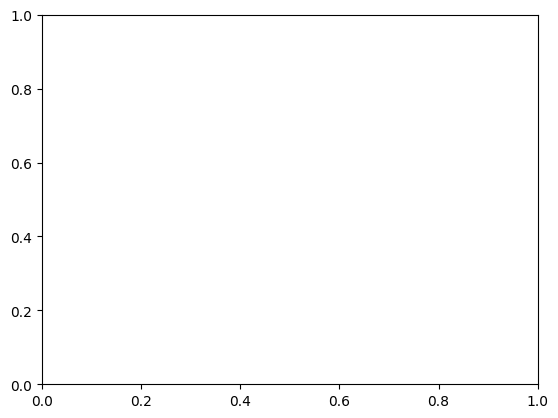

In [24]:
cars['year'] = cars['year'].dropna().astype(int)
cars.plot(kind='scatter', x=cars['year'], y=cars['price'])